In [1]:
# Praktikum 1 - Teil-Aufgabe-1
import pandas
csv_reader = pandas.read_csv('../train_small.csv')

# Wir geben die Namen der Spalten/Merkmale aus.
columns = csv_reader.columns
for i,col in enumerate(columns):
    print('%d : %s' %(i,col))

# Wir konvertieren die Daten in ein Numpy-Array.
data = csv_reader.values

0 : Artist
1 : Song
2 : Genre
3 : Language
4 : Lyrics


In [2]:
# Praktikum 1 - Teil-Aufgabe-2
import numpy as np

# print("The Number of all Genres in The csv_file: ", len(data[:,2])) # Prints The Number of all Genres
genre_column = data[:,2]

# genres = np.array(list(dict.fromkeys(genre_column))) # This Code Removes Duplicates, but in This Case is not Efficient

genres = set(genre_column) # Effizienter, denn Set enthält keine Duplikate, aber List schon  

print("There is %s Lyrics for Pop Songs" % (len(data[data[:,2] == 'Pop']))) # Prints How many Rows is in ex. Pop

print("There is %d Genres and There are:" % (len(genres)), genres)

There is 3755 Lyrics for Pop Songs
There is 10 Genres and There are: {'Jazz', 'Hip-Hop', 'Indie', 'Folk', 'Electronic', 'Rock', 'Metal', 'R&B', 'Country', 'Pop'}


In [3]:
# Praktikum 1 - Teil-Aufgabe-3
import nltk
from collections import Counter

def join_all_lyrics(list):
    all_genre_lyrics_string = ' '.join([str(item) for item in list])
    return all_genre_lyrics_string

# Pop = data[data[:,2] == 'Pop'][:,4] # Wichtiger Code
# print(Pop)
# tokWords = nltk.word_tokenize(join_all_lyrics(Pop)) # Version 1
# print(tokWords) # Test tokWords Orginal !!!!

def most_common_10(List):
    cnt = Counter()
    for my_list in List:
        cnt[my_list] += 1
#     print(cnt) # Prints All Terms in a List and The Number of Them in The List => (Key, Value)
# Ich glaube das ist das Vokabular
    return cnt.most_common(10)

In [4]:
# Praktikum 1
import time

def most_common_10_in_genre(genre):
    lyrics_from_genre = data[data[:,2] == genre][:,4] # Wichtiger Code
    tokWords_genre = nltk.word_tokenize(join_all_lyrics(lyrics_from_genre))
    print("Most Common 10 Terms in %s are: (With Their Count)" % (genre))
    print(most_common_10(tokWords_genre),"\n")

def run_code():
    start_time = time.time()
    for genre in genres:
        most_common_10_in_genre(genre)
    end_time = time.time()
    print(end_time-start_time, "Sekunden")
        
# run_code()

In [5]:
# Warum können Sie anhand der Terme nicht die Klasse erraten ?

# Die Antwort ist: Weil die am meisten verwendete Wörter in der Sprache ausgegeben werden. 
# wie z.B. "the", "and", "I", "you", ...
# Außerdem nicht nur am meisten verwendete Wörter in der Sprache ausgegeben werden sonderen auch die Satzzeichen
# wie z.B. ",", ".", ...

In [6]:
# Praktikum 1
# Teil-Aufgabe-4 # Verbesserte Lösung (Version 3 am effizientesten doppelt so schnell nltk.word_tokenize wir nur einmal aufgerufen)

start_time = time.time()

tmp_list_1 = []
tmp_list_2 = []

def trim_lowercase_tokenize_function(song):
    tmp_list = nltk.word_tokenize(str(song).replace(",", "").replace(".", "").lower())
    tmp_list_1.append(tmp_list)
    tmp_list_2.append(set(tmp_list))

# Loop All Songs
for song in data[:,4]:
    # What The Following Function does is: 1) Separate Commas and Periods, 2) Lowercase The Strings, 3) Tokenize The Words
    trim_lowercase_tokenize_function(song)
    
# Count all The Words in The Songs and see how often does a word appear
def count_words(tmp_list):
    cnt = Counter()
    for my_list in tmp_list:
        for my_set in my_list:
            cnt[my_set] += 1
    # print(cnt)
    return dict(cnt)

words_occur_min_10_times_set = set()
words_occur_in_min_5_songs_set = set()

# Take The Words That appears at least 10 Times and put it in a List
words_occur_min_10_times_set = {key for key,value in count_words(tmp_list_1).items() if value >= 10}

# Take The Words That appears at least in 5 different Songs/Dokuments and put it in a List
words_occur_in_min_5_songs_set = {key for key,value in count_words(tmp_list_2).items() if value >= 5}

at_least_10_times_and_in_5_different_songs_set = set()

at_least_10_times_and_in_5_different_songs_set = words_occur_min_10_times_set.intersection(words_occur_in_min_5_songs_set)

# Make the list a Dictionary of Vokabular
vokabular = {x: i for i,x in enumerate(at_least_10_times_and_in_5_different_songs_set)}

print(vokabular)
print(len(vokabular))

end_time = time.time()
print(end_time-start_time, "Sekunden")

# Testing:
#----------
# print(at_least_10_times_list)
# Testing how many times a word occurs
# print(count_words_dict.get('just'))
# print("words_occur_min_10_times_list",len(words_occur_min_10_times_list))
# print("words_occur_in_min_5_songs_list",len(words_occur_in_min_5_songs_list))

{'fi': 0, ')': 1, 'toss': 2, 'whipping': 3, 'horizonte': 4, 'stitch': 5, 'singing': 6, 'track': 7, 'ridin': 8, 'gray': 9, 'dor': 10, 'perto': 11, 'accident': 12, 'starving': 13, 'dusty': 14, 'menace': 15, 'vivir': 16, 'gasoline': 17, 'starts': 18, 'homeward': 19, 'zona': 20, 'grande': 21, 'trying': 22, 'decline': 23, 'tunnel': 24, 'reel': 25, 'sh-t': 26, 'parado': 27, 'tirando': 28, 'glória': 29, 'perdida': 30, 'vista': 31, 'parou': 32, 'bite': 33, 'condition': 34, 'overdrive': 35, 'shorty': 36, 'nick': 37, 'universe': 38, "'re": 39, 'pitiful': 40, 'staring': 41, 'sits': 42, 'cloudy': 43, 'astray': 44, 'slidin': 45, 'almas': 46, 'pop': 47, 'delight': 48, "it's": 49, 'lane': 50, 'says': 51, 'breezy': 52, 'skirt': 53, 'embora': 54, 'counting': 55, 'chop': 56, 'keepin': 57, 'shared': 58, 'spanish': 59, 'fearing': 60, 'costas': 61, 'forever': 62, 'maeil': 63, 'belief': 64, 'ficando': 65, 'ache': 66, 'coffee': 67, 'pros': 68, 'ins': 69, 'circling': 70, 'nó': 71, 'emoção': 72, 'photograph': 

59.17784929275513 Sekunden
1000
1000
hit_percent = 35.4 %
[[ 1  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [32  8 40  8 31 27  1  2 14  9]
 [21  6  5 16  6 11  1  2  1  2]
 [ 5  5  2  3 29 12 26  1 11  5]
 [43 44 18 12 47 93  6 14 32 21]
 [ 3  1  0  0  2  1 87  2  2  2]
 [ 3  8  3 10 18 34  4 79 22 13]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 2  1  3  1  7  4  2  0  2  9]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['Country', 'Indie', 'Jazz', 'Folk', 'Pop', 'Rock', 'Hip-Hop', 'Metal', 'Electronic', 'R&B'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


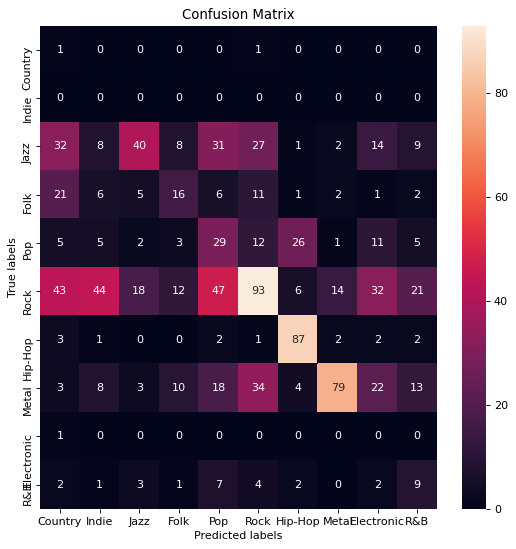

In [7]:
#!/usr/bin/env python
import sys, os, argparse
from collections import Counter
import pickle
import numpy as np
import math
from sklearn.metrics import confusion_matrix #NEW
import seaborn as sns #Extra
import matplotlib.pyplot as plt #Extra
from matplotlib.pyplot import figure #Extra
# import sklearn

"""
  Lyrics Classifier
  -------------------------
  a small interface for document classification. Implement your own Naive Bayes classifier 
  by completing the class NaiveBayesLyricsClassifier below.
"""
class NaiveBayesLyricsClassifier:
    
    def __init__(self):

        """ The classifier should store all its learned information
            in this 'model' object. Pick whatever form seems appropriate
            to you. Recommendation: use 'pickle' to store/load this model! """
        self.model = None
        if os.path.isfile('model.pkl'):
            with open('model.pkl', 'rb') as file:
                self.model = pickle.load(file)
    
    def train(self, features, labels):
                
        # FIXME: train model
        
        start_time = time.time()
        arr = np.column_stack((features, labels)) # sieht so aus => [ [list(['juliet', "'s", 'trying', ...)] 'Pop'], ...]
        
        cnt_labels= Counter(labels) # sieht so aus => Counter({'Rock': 4169, 'Pop': 3755, 'Metal': 691, ...})
        cnt_prior=Counter()
        end_list=[]
        value_list=[]
        genre_list=[]
        for genre in genres:
            cnt_prior[genre] =  cnt_labels[genre] / len(labels) # Die Wahrscheinlichkeit jeder Klasse => P(C)
#             print("cnt_prior",cnt_prior['Metal'])
            # Wahrscheinlichkeiten P(xi = 1|c)
            lyrics_from_genre = arr[arr[:,1] == genre][:,0] # Wichtiger Code
            cnt_genreWords = Counter()
            cnt_BagOfWords = Counter()
            
            for lyric in lyrics_from_genre:
                set_words = set(lyric)
                for vok in vokabular:
                    if vok in set_words:
                        cnt_BagOfWords[vok]=1
                    elif cnt_BagOfWords[vok]==0 :
                        cnt_BagOfWords[vok]=0
                    else:
                        cnt_BagOfWords[vok]=0
                for item in set_words:  
                    cnt_genreWords[item] += 1
                    
            BagOfWords = dict(cnt_BagOfWords)

            positive_in_bag = {key for key,value in BagOfWords.items() if value >= 0}
            
#           Wahrscheinlichkeit von Terme
            value=Counter()
            for item in positive_in_bag:
                
                x = cnt_genreWords.get(item)
                if x == None:
                    x=0
                percent = (x)/(len(lyrics_from_genre))
                value[item]=percent

#             value_dict = dict(value) 
#             print(genre)
#             print(value_dict)
#             = {genre: value_dict}
            value_list.append(dict(value))
            genre_list.append(genre)
        print(len(value_list))
        print(len(genres))
        
        # value_list =>
#         store = np.column_stack((value_list, genres))
            #print(genre)
           # print("fight",value_dict.get("fight"))
#         model=end_list
        cs = genre_list
        self.model = cs,value_list, cnt_prior
        #print(self.model)
        with open('model.pkl', 'wb') as file:
            pickle.dump(self.model, file)

#                   pickle.dump(model, file)
#protocol=pickle.HIGHEST_PROTOCOL
#           TEST            
            
#             print("shake",value_dict.get("shake"))
#             print(BagOfWords)
#             print(len(BagOfWords))
#             print(len(positive_in_bag))
#             print(f'P(xi=1|c) {value_dict}')
#             print(len(positive_in_bag))
#             print(value_dict)
#             print(f'P(c) Prior{cnt_prior_dict}') 
        
            
        end_time = time.time()
        print(end_time-start_time, "Sekunden")   
        
    def apply(self, features):
        # FIXME: implement 
        start_time = time.time()
        genre_list, value_list , cnt_prior  = self.model
        
        def score(c, values,null_values):
            score = math.log10(cnt_prior.get(c))
            epsilon = 0.001

            for wk in values:
                wk=math.log10(max(wk, epsilon))
                score = score + wk
           
            for w in null_values:
                if w<1:
                    w=math.log10(1-(max(w, epsilon)))
                else:
                    w=0
                score = score + w
            return score
        
#         print(self.model)
        label_list=[]
    
        for song in features:
            i=0
            min_value= -10000000
            song = set(song)
#             print("len(value_list):",len(value_list))
            for data in value_list:
                tmp = data.items()
                values = []
                rest_values = []
              
                for key,value in tmp:
                    if key in song:
                        values.append(value)
                    else:
                        rest_values.append(value)

                tmp2 = score(genre_list[i], values,rest_values)
#                 print("tmp2 :",tmp2)
                if(tmp2 > min_value):
                    min_value= tmp2
                    x_klasse = genre_list[i]
                i+=1
            label_list.append(x_klasse)
#             print("x_klasse: ",x_klasse)
        end_time = time.time()
        print(end_time-start_time, "Sekunden")
#         print("label_list: ",label_list)
        return label_list
    #               
#                 print("score(klasse, values):",score(klasse, values,rest_values))
#                 print("------------------------------------------------------------------------")                            
#                 value = {value for key,value in tmp.items() if key == word}
#                 print("value",value)

                
if __name__ == "__main__":

    #parse command line arguments (no need to touch)
    #parser = argparse.ArgumentParser(description='A document classifier.')
    #parser.add_argument('--train', help="train the classifier", action='store_true')
    #parser.add_argument('--apply', help="apply the classifier (you'll need to train or load"\
                                 #       "a trained model first)", action='store_true')
    #parser.add_argument('--inspect', help="get some info about the learned model",
#                         action='store_true')

    #args = parser.parse_args()

    classifier = NaiveBayesLyricsClassifier()

    #if args.train:
    # FIXME: implement
    # features,labels = ...

#     lyrics  = data[:,4]
#     labels = data[:,2]
#     features = []
    test_features = []
#     for lyric in lyrics:
#         features.append(nltk.word_tokenize(str(lyric).replace(",", "").replace(".", "").lower()))
    
#     classifier.train(features, labels)
   
    #if args.apply:
    # FIXME: implement later

    csv_reader = pandas.read_csv('test.csv')
    test_data = csv_reader.values
    
    lyrics = test_data[:1000,4]
    
    for lyric in lyrics:
        test_features.append(nltk.word_tokenize(str(lyric).replace(",", "").replace(".", "").lower()))
   
#     print(len(test_features))
#     print(classifier.apply(test_features))
#     print(data[:10,2])
    
    def messen():
        apply_result = classifier.apply(test_features)
        genre_list = list(test_data[:1000,3])
        print(len(apply_result))
        print(len(genre_list))
        count_same_items_with_same_index = 0
        for i in range(len(apply_result)):
            if apply_result[i] == genre_list[i]:
                count_same_items_with_same_index += 1
        hit_percent = count_same_items_with_same_index / len(apply_result) * 100
        print("hit_percent =", hit_percent, "%")
#         print(count_same_items_with_same_index)
        labels = ['Country', 'Indie', 'Jazz', 'Folk', 'Pop', 'Rock', 'Hip-Hop', 'Metal', 'Electronic', 'R&B']
        confusion_matrix_result = confusion_matrix(apply_result, genre_list, labels)
        print(confusion_matrix_result)
        ################### Extra Code to Better Understand The Results of The Confusion Matrix ########################
        figure(figsize=(8, 8), dpi=80) # to make the plott bigger
        ax= plt.subplot()
        sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
        
        # labels, title and ticks
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
        ax.set_title('Confusion Matrix'); 
        ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
        ################################################################################################################

    messen() # UNCOMMENT TO TEST !!!
        
        
# #     classifier.apply(features)


In [8]:
# For Testing